# Exploratory Data Analysis

In [86]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd
import pickle
import numpy as np
import sklearn
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pylab

from pandasql import *
from pandasql import sqldf
sql = lambda q: sqldf(q, globals()) 
print('This file is located in the following directory: \n'+os.getcwd())

pd.set_option('display.max_rows', None) #show max rows in df
pd.reset_option("^display") #reset display

#Matplotlib settings
matplotlib.rcdefaults() #changes parameters to defaults

This file is located in the following directory: 
/Users/christopherjose/Desktop/Work/Projects/Kaggle/Titanic


In [230]:
df=pd.read_csv('/Users/christopherjose/Desktop/Work/Projects/2020/df_eda.csv')     
df=df.drop(['I_trial','I_firmness','I_weight','I_height','I_price'],axis=1)

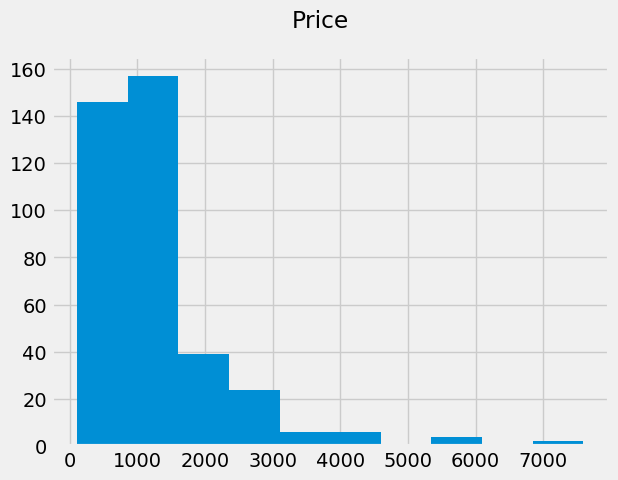

In [287]:
matplotlib.rcdefaults()
plt.style.use('fivethirtyeight')
plt.suptitle('Price')
df.price.hist();

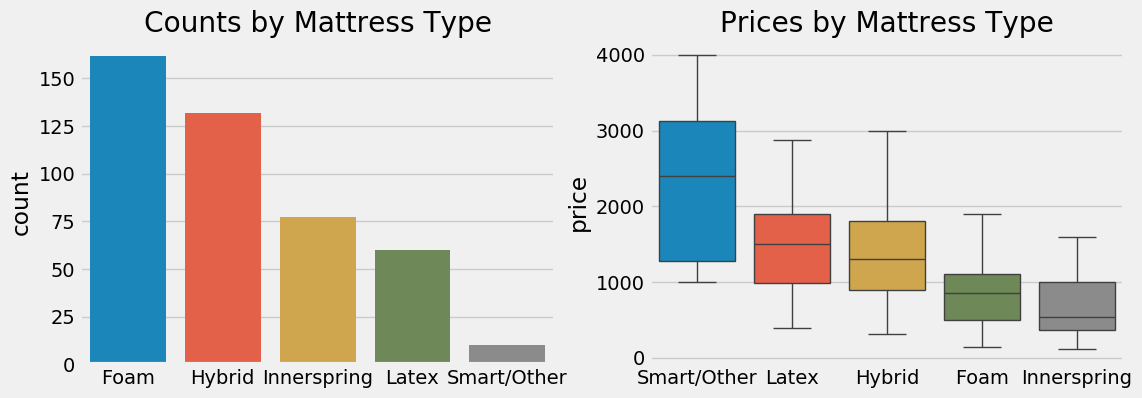

In [118]:
eda=pd.DataFrame(df.groupby('type').size(),columns=['count']).reset_index()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,2,figsize=(12,4)) 
ax0=sns.catplot(x='type',y='count',data=eda,kind='bar',ax=ax[0]) 
ax1=sns.boxplot(x='type',y='price',data=df,showfliers=False,orient='v',ax=ax[1],
                order=['Smart/Other','Latex','Hybrid','Foam','Innerspring'],
                linewidth=1)
ax[0].title.set_text('Counts by Mattress Type')
ax[1].title.set_text('Prices by Mattress Type')
ax[0].set_xlabel('')  
ax[1].set_xlabel('') 

plt.close(2); #sns only plots on first spot for some reason, so this closes out the blank 2nd plot that is made

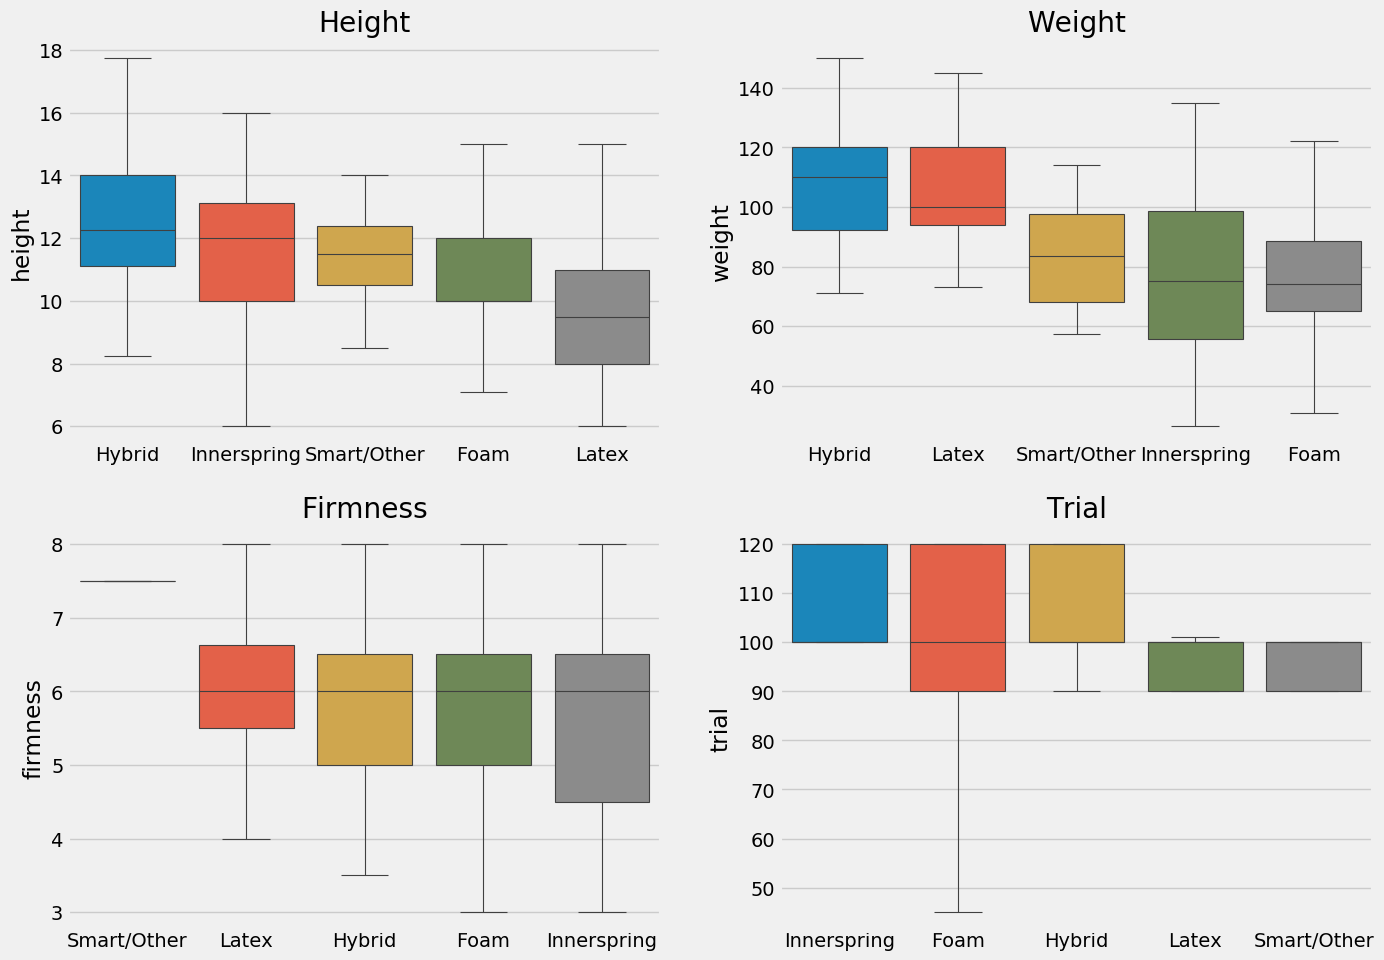

In [95]:
eda1=df.groupby('type').height.mean().sort_values(ascending=False).index
eda2=df.groupby('type').weight.mean().sort_values(ascending=False).index
eda3=df.groupby('type').firmness.mean().sort_values(ascending=False).index
eda4=df.groupby('type').trial.mean().sort_values(ascending=False).index

#sns.set(font_scale=1,palette='Paired',style='darkgrid')
matplotlib.rcdefaults()
plt.style.use('fivethirtyeight')
pylab.rcParams['xtick.major.pad']='.3'

fig, ax = plt.subplots(2,2,figsize=(15,11)) #or (20,8)
ax0=sns.boxplot(x='type',y='height',data=df,showfliers=False,orient='v',ax=ax[0,0], linewidth=.8, order=eda1)
ax1=sns.boxplot(x='type',y='weight',data=df,showfliers=False,orient='v',ax=ax[0,1], linewidth=.8, order=eda2)
ax2=sns.boxplot(x='type',y='firmness',data=df,showfliers=False,orient='v',ax=ax[1,0], linewidth=.8, order=eda3)
ax3=sns.boxplot(x='type',y='trial',data=df,showfliers=False,orient='v',ax=ax[1,1], linewidth=.8, order=eda4)

ax[0,0].title.set_text('Height')
ax[0,1].title.set_text('Weight')
ax[1,0].title.set_text('Firmness')
ax[1,1].title.set_text('Trial')

ax[0,0].set_xlabel('')  
ax[0,1].set_xlabel('')  
ax[1,1].set_xlabel('')  
ax[1,0].set_xlabel('');

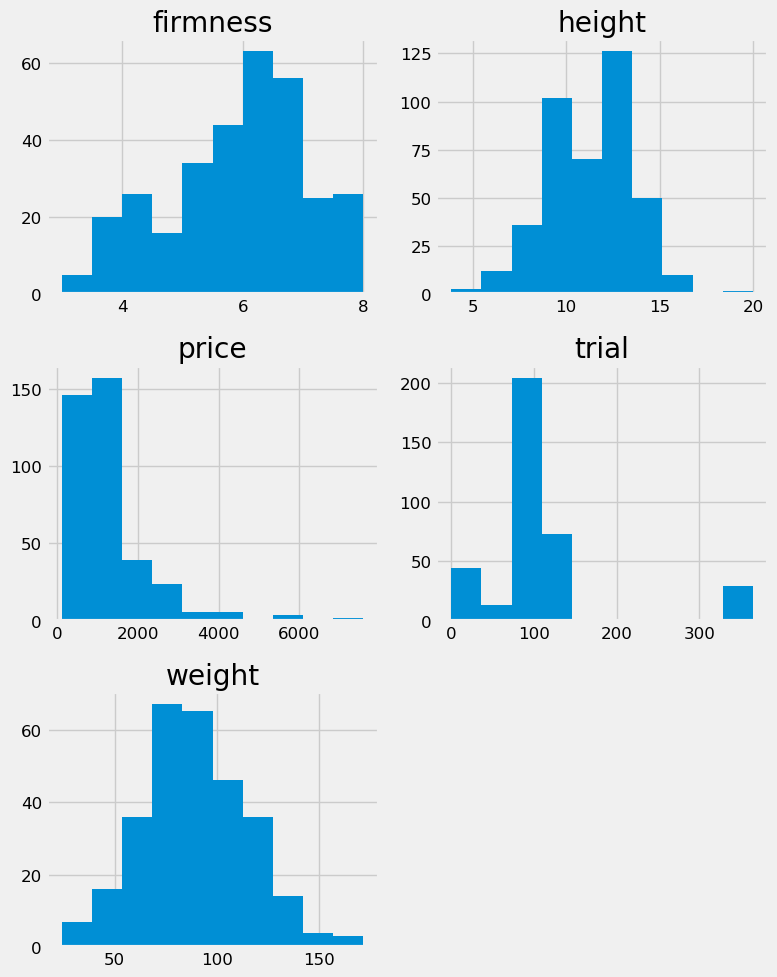

In [122]:
matplotlib.rcdefaults()
plt.style.use('fivethirtyeight')
df.hist(figsize=(8,10),xlabelsize=12, ylabelsize=12)
plt.tight_layout();

In [123]:
df.corr()

,price,height,weight,firmness,trial
price,1.000000,0.359316,0.551061,-0.170031,-0.243297
height,0.359316,1.000000,0.505867,-0.295542,-0.102193
weight,0.551061,0.505867,1.000000,-0.007154,-0.139456
firmness,-0.170031,-0.295542,-0.007154,1.000000,0.189749
trial,-0.243297,-0.102193,-0.139456,0.189749,1.000000


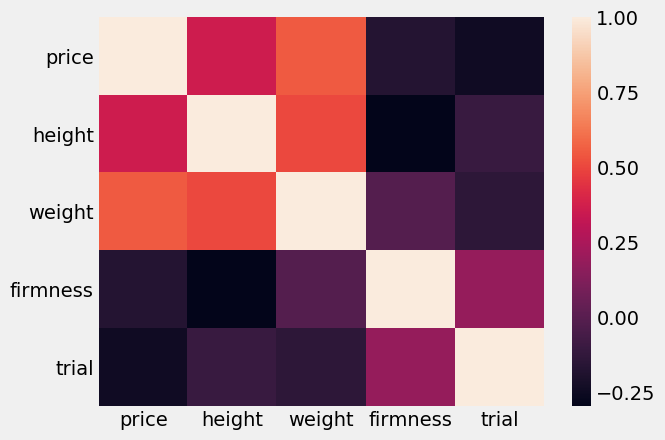

In [127]:
sns.heatmap(df.corr());

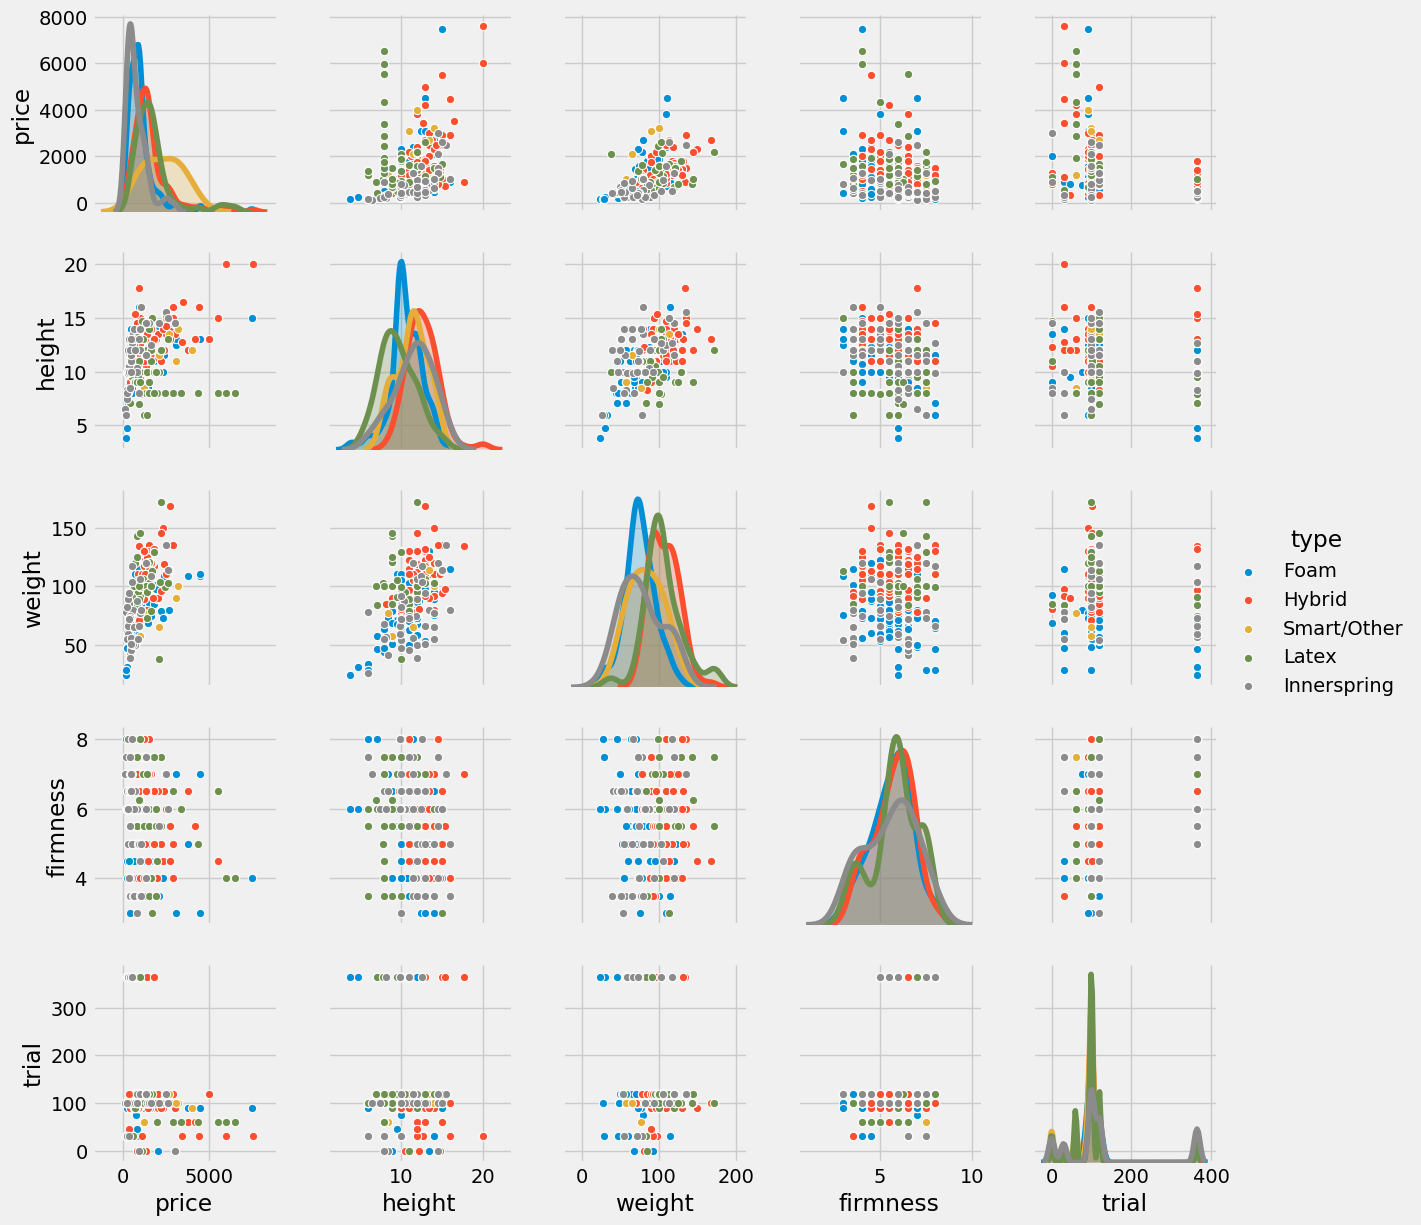

In [130]:
sns.pairplot(df,hue='type');

In [132]:
foam=df.loc[df.type=='Foam']
hybrid=df.loc[df.type=='Hybrid']
latex=df.loc[df.type=='Latex']
innerspring=df.loc[df.type=='Innerspring']

Foam-- Compared to all mattresses, we see a stronger correlation between (firmness, price) and (height, price).

In [135]:
foam.corr()

,price,height,weight,firmness,trial
price,1.000000,0.498490,0.553956,-0.286048,-0.173985
height,0.498490,1.000000,0.696302,-0.484490,-0.345516
weight,0.553956,0.696302,1.000000,-0.418539,-0.291671
firmness,-0.286048,-0.484490,-0.418539,1.000000,0.236263
trial,-0.173985,-0.345516,-0.291671,0.236263,1.000000


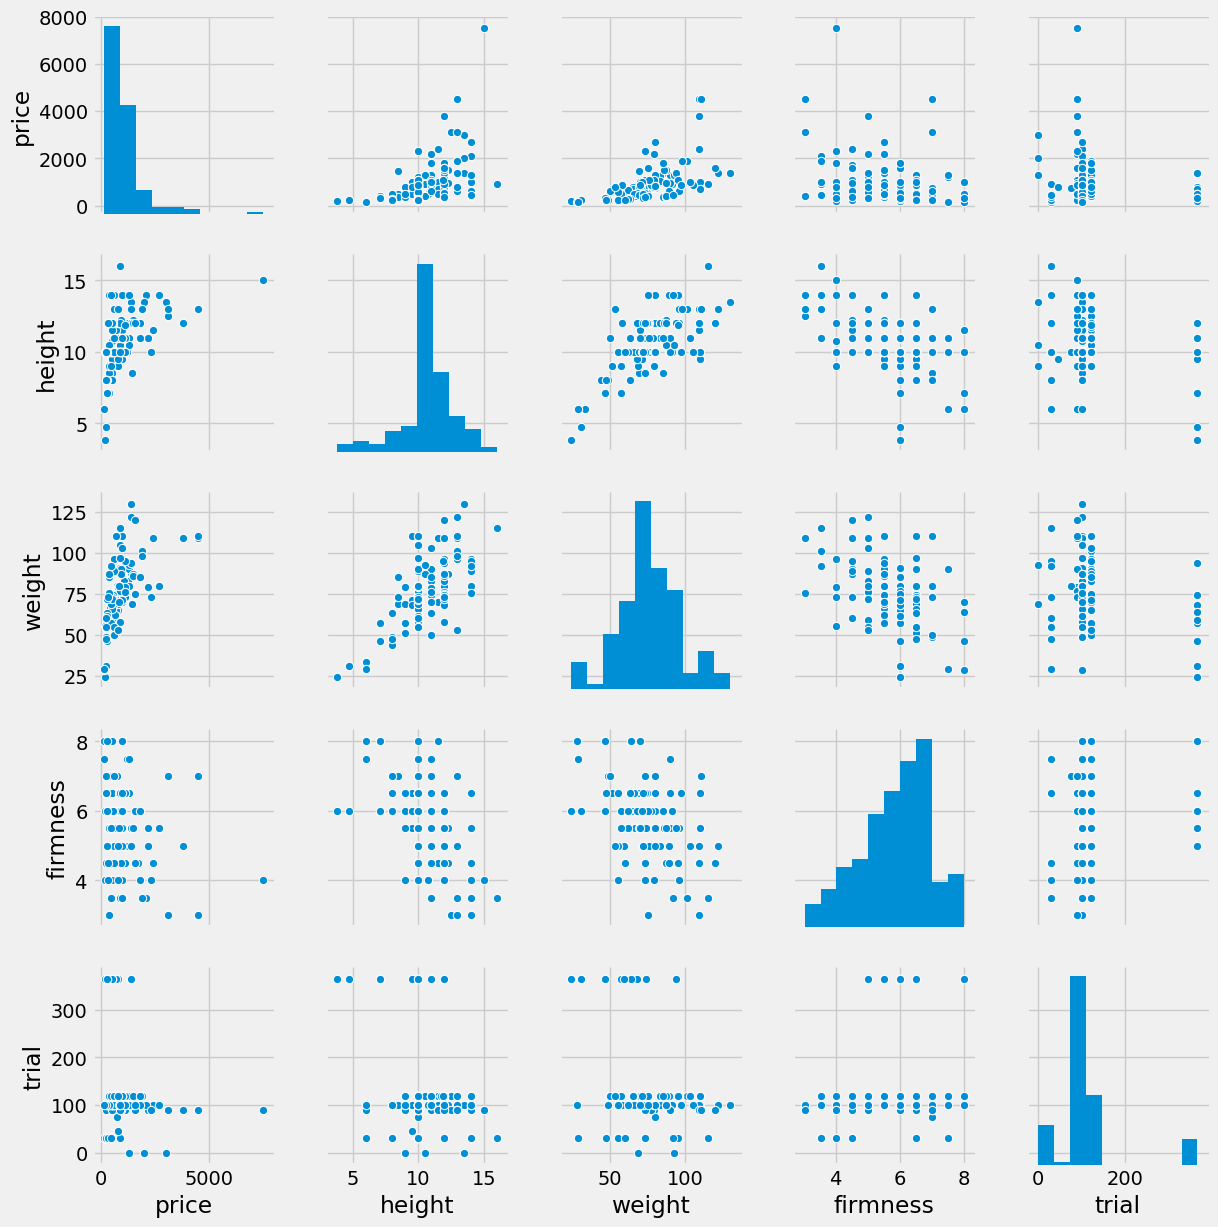

In [134]:
sns.pairplot(foam);

Innerspring has strong correlations between weight, height, and price.

In [139]:
innerspring.corr() 

,price,height,weight,firmness,trial
price,1.000000,0.619436,0.670841,-0.069107,-0.321700
height,0.619436,1.000000,0.452113,-0.381573,0.018015
weight,0.670841,0.452113,1.000000,0.197831,-0.254725
firmness,-0.069107,-0.381573,0.197831,1.000000,0.162187
trial,-0.321700,0.018015,-0.254725,0.162187,1.000000


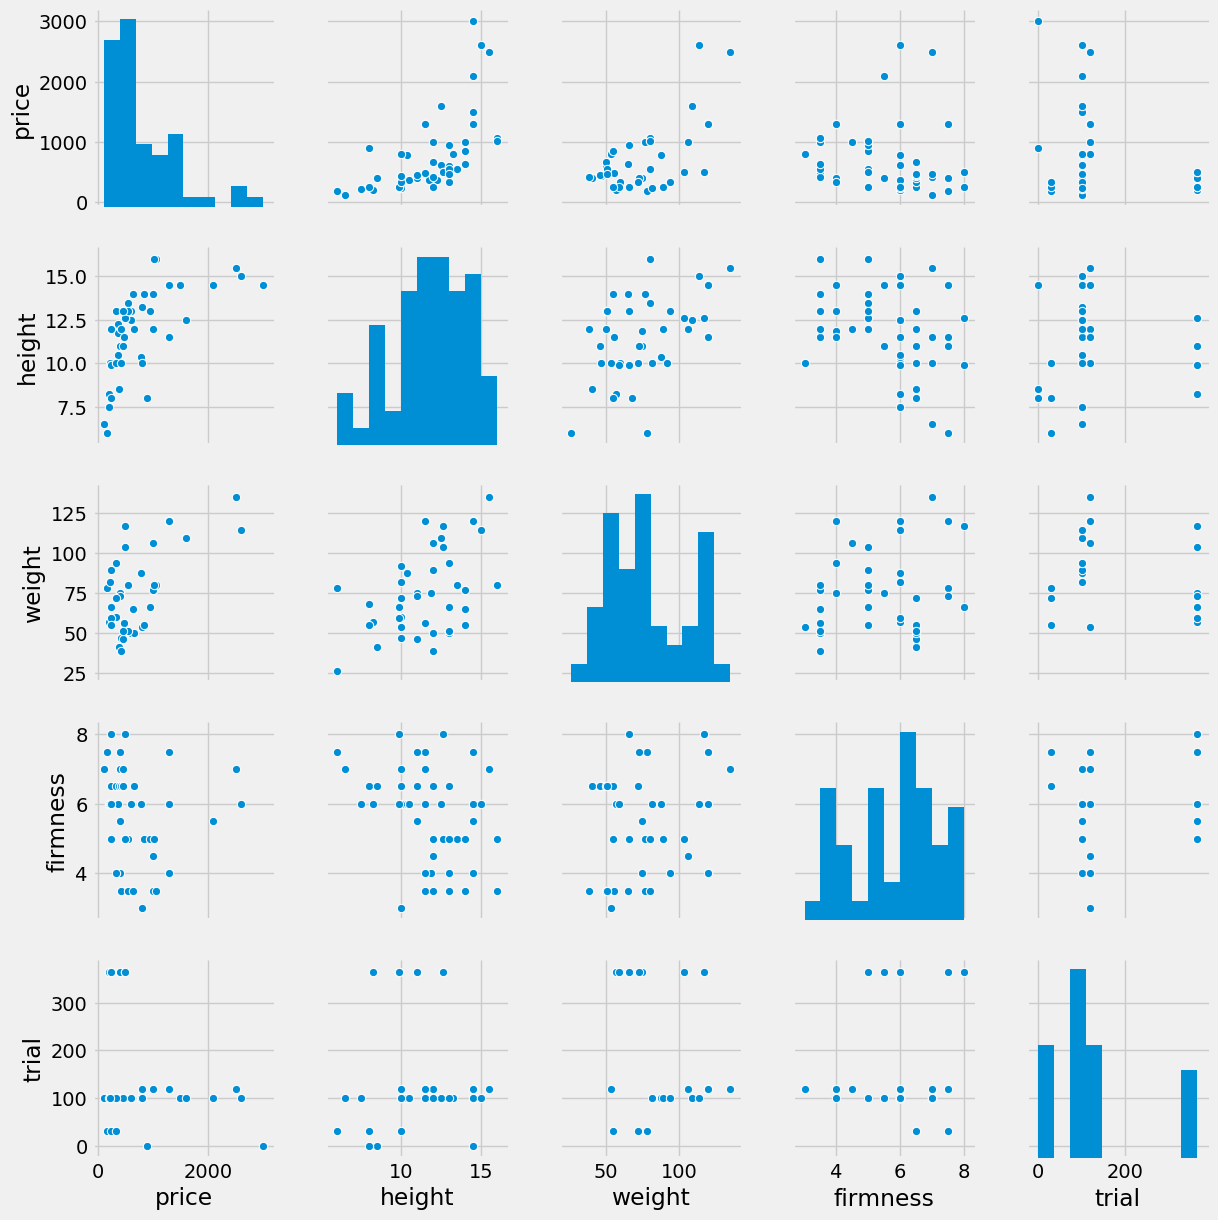

In [140]:
sns.pairplot(innerspring);

# Does excluding outliers impact correlations?

In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

price       953.000
height        3.000
weight       36.975
firmness      1.500
trial        30.000
dtype: float64

In [168]:
outliers=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_out= df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

foam_out=df_out.loc[df_out.type=='Foam']
hybrid_out=df_out.loc[df_out.type=='Hybrid']
latex_out=df_out.loc[df_out.type=='Latex']
innerspring_out=df_out.loc[df_out.type=='Innerspring']

In [177]:
innerspring.corr()
innerspring_out.corr()

,price,height,weight,firmness,trial
price,1.000000,0.619436,0.670841,-0.069107,-0.321700
height,0.619436,1.000000,0.452113,-0.381573,0.018015
weight,0.670841,0.452113,1.000000,0.197831,-0.254725
firmness,-0.069107,-0.381573,0.197831,1.000000,0.162187
trial,-0.321700,0.018015,-0.254725,0.162187,1.000000


,price,height,weight,firmness,trial
price,1.000000,0.619271,0.726408,0.100928,0.363505
height,0.619271,1.000000,0.444761,-0.282546,0.268115
weight,0.726408,0.444761,1.000000,0.286979,0.408086
firmness,0.100928,-0.282546,0.286979,1.000000,-0.184291
trial,0.363505,0.268115,0.408086,-0.184291,1.000000


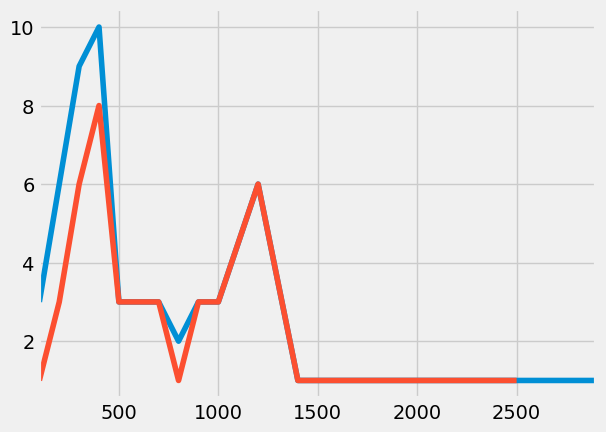

In [205]:
(innerspring.price//100*100).value_counts().sort_index().plot(kind='line')
(innerspring_out.price//100*100).value_counts().sort_index().plot(kind='line')

Removing outliers doesn't affect weight and height's correlation with price.  <br>
It diminishes the correlation between price and firmness and trial, however.

In [274]:
(10//4)*4

8

In [206]:
df.corr()
df_out.corr()

,price,height,weight,firmness,trial
price,1.000000,0.359316,0.551061,-0.170031,-0.243297
height,0.359316,1.000000,0.505867,-0.295542,-0.102193
weight,0.551061,0.505867,1.000000,-0.007154,-0.139456
firmness,-0.170031,-0.295542,-0.007154,1.000000,0.189749
trial,-0.243297,-0.102193,-0.139456,0.189749,1.000000


,price,height,weight,firmness,trial
price,1.000000,0.357839,0.536884,-0.071066,-0.003641
height,0.357839,1.000000,0.420889,-0.300319,0.223477
weight,0.536884,0.420889,1.000000,0.062571,0.053434
firmness,-0.071066,-0.300319,0.062571,1.000000,-0.020623
trial,-0.003641,0.223477,0.053434,-0.020623,1.000000


# Do brands with similiarly priced multi-firmness mattresses impact the data?

Certain brands offer mattresses having the same price across differing firmnesses.  For mattresses not belonging to the same brand, can firmness be predictive of price?  In other words, if we have a set of mattresses, where each mattress is from a different brand, does firmness matter?

In [265]:
#Import in dataset excluding mattresses with multiple firmnesses from other notebook
df7=pd.read_csv('/Users/christopherjose/Desktop/Work/Projects/2020/df5_no_multi.csv')     
df7['price'] = df7.price.str.strip('$').str.strip('*')
df7['price']=df7.price.astype('float')

#It is not a large increase in correlation between price and firmness
df8.corr().loc['price','firmness'] 
df.corr().loc['price','firmness']

-0.21552746919837482

-0.17003054073375934

In [276]:
df8.brand.unique()

array(['Nectar', 'Casper', 'DreamCloud', 'Bear', 'Leesa', 'Purple',
       'Tuft & Needle', 'Awara', 'Saatva', 'Propel', 'Winkbeds',
       'Allswell', 'Nolah', 'Helix Sleep', 'Parachute', 'Brunswick',
       'Recore', 'Tempur-Pedic', 'Titan', 'Plank', 'Brooklyn Bedding',
       'Douglas', 'My Green Mattress', 'Puffy', 'Big Fig', 'Eight',
       'Rest', '2920 Sleep', 'Airweave', 'Amazonbasics',
       'Ameena by US-Mattress.com', 'Amerisleep', 'Apollo', 'Aslan',
       'Beautyrest Black', 'BedInABox', 'Birch', 'Bob-O-Pedic',
       'Boll & Branch', 'Brentwood Home', 'Comfortaire', 'Craft',
       'Craftmatic', 'Crave', 'Diamond Mattress', 'Doze',
       'Dreamfoam Bedding', 'Duxiana', 'Ecosleep', 'eLuxury', 'Emma',
       'Endy', 'Englander', 'Essentia', 'Ethan Allen', 'Eve', 'Floyd',
       'Freya by Brooklyn Bedding', 'GhostBed', 'Hampton & Rhodes',
       'Hyphen', 'Ikea', 'Intellibed', 'Jazvin', 'Joybed', 'Keetsa',
       'Linenspa', 'Live and Sleep', 'Lucid', 'Lull', 'Luxi',
     